# Characterising Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

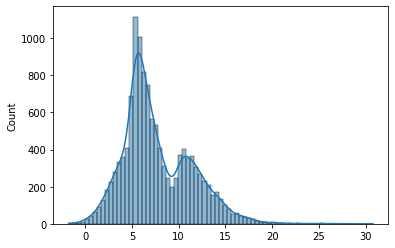

In [2]:
data = np.loadtxt("../../data/dataset.txt")
sns.histplot(data, kde=True);

In [3]:
def get_mean(xs):
    summ = 0
    for x in xs:
        summ += x
    return summ / len(xs)

In [4]:
print(get_mean([3, 5, 2, 6]))

4.0


In [5]:
μ = np.mean(data)
print(μ, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


In [6]:
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid-1:mid+1])

In [7]:
print(get_median([7, 7, 3, 1, 4, 5]))

4.5


In [8]:
median = np.median(data)
print(median)

6.7325


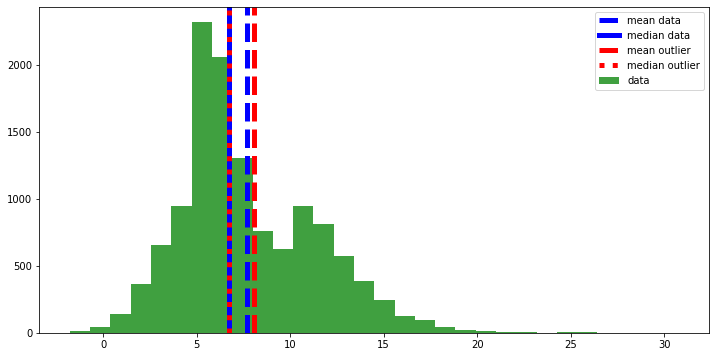

In [9]:
outlier = np.insert(data, 0, 5000)
bins = 30
plt.figure(figsize=(12,6))
plt.hist(data, bins=bins, color='green', label='data', alpha=0.75);
plt.axvline(np.mean(data), ls='--', c='b', lw=5, label='mean data');
plt.axvline(np.median(data), ls='-', c='b', lw=5, label='median data');
plt.axvline(np.mean(outlier), c='r', ls='--', lw=5, label='mean outlier');
plt.axvline(np.median(outlier), c='r', ls=':', lw=5, label='median outlier');
plt.legend();

In [10]:
def get_mode(xs):
    vals, counts = np.unique(xs, return_counts=True)
    max_count_idx = np.argmax(counts)
    return vals[max_count_idx]

In [11]:
print(get_mode([1, 7, 2, 5, 3, 3, 8, 3, 2]))

3


In [12]:
import scipy.stats as ss
print(ss.mode(data))

ModeResult(mode=array([5.519]), count=array([9]))


In [13]:
hist, edges = np.histogram(data, bins=10000)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.41347135


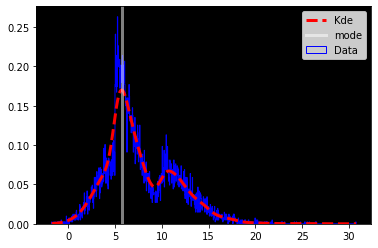

In [14]:
kde = ss.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]

fig = plt.figure()
ax = plt.axes()
ax.set_facecolor('k')
plt.hist(data, bins=1000, density=True, label='Data', histtype='step', color='b');
plt.plot(xvals, yvals, label='Kde', color='r', lw=3, ls='--');
plt.axvline(mode, label='mode', color='w', lw=3, alpha=0.5);
plt.legend();

In [15]:
def get_variance(xs):
    μ = np.mean(xs)
    summ = 0
    for x in xs:
        summ += (x - μ) ** 2
    return summ / len(xs) - 1

In [16]:
print(get_variance([1, 2, 3, 4, 5]))

1.0


In [17]:
var = np.var(data, ddof=1)
print(var)

13.137626632694301


In [18]:
σ = np.std(data)
print(σ)
print(np.sqrt(var))

3.6244414221454435
3.624586408501569


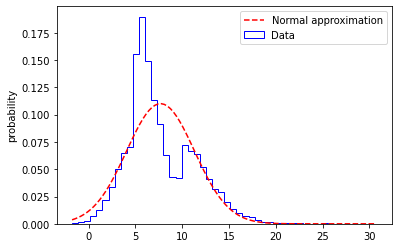

In [19]:
xs = np.linspace(data.min(), data.max(), 100)
ys = ss.norm.pdf(xs, loc=np.mean(data), scale=np.std(data))

plt.hist(data, bins=50, color='b', density=True, histtype='step', label='Data');
plt.plot(xs, ys, 'r--', label='Normal approximation');
plt.ylabel('probability');
plt.legend();

In [20]:
# skewness
# first moment is 0
# second moment is variance
# third moment is skewness
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summ = 0
    for x in xs:
        summ += (x - mean) ** 3
    return (summ / len(xs)) / (var ** 1.5)

In [21]:
print(get_skewness([1, 2, 3, 4, 5]))

0.0


In [22]:
skew = ss.skew(data)
print(skew, get_skewness(data))

0.7408773663373577 0.7408773663373582


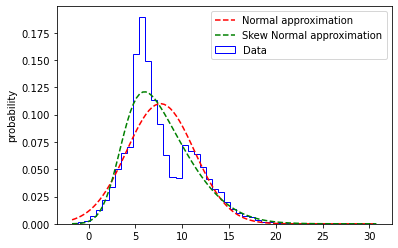

In [23]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = ss.norm.pdf(xs, loc=np.mean(data), scale=np.std(data))
ps = ss.skewnorm.fit(data)
ys2 = ss.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, color='b', density=True, histtype='step', label='Data');
plt.plot(xs, ys1, 'r--', label='Normal approximation');
plt.plot(xs, ys2, 'g--', label='Skew Normal approximation');
plt.ylabel('probability');
plt.legend();

In [24]:
# kurtosis
# fourth moment
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summ = 0
    for x in xs:
        summ += (x - mean) ** 4
    return (summ / len(xs)) / (var ** 2)

In [25]:
print(get_kurtosis([1, 2, 3, 4, 5]))

1.7


In [26]:
kurt = ss.kurtosis(data, fisher=False)
print(kurt, get_kurtosis(data))

3.5517538497309498 3.551753849730955


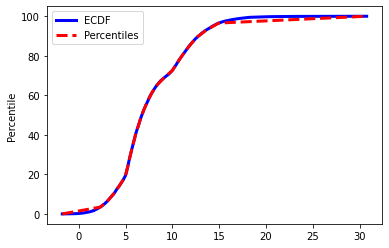

In [27]:
ps = np.linspace(0, 100, 30)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label='ECDF', color='b', lw=3);
plt.plot(x_p, ps, label='Percentiles', color='r', lw=3, ls='--');
plt.ylabel('Percentile');
plt.legend();

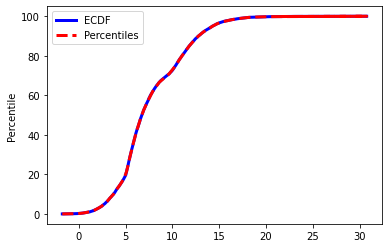

In [28]:
ps = 100 * ss.norm.cdf(np.linspace(-3, 3, 50))
ps = np.insert(ps, 0, 0)
ps = np.insert(ps, -1, 100)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label='ECDF', color='b', lw=3);
plt.plot(x_p, ps, label='Percentiles', color='r', lw=3, ls='--');
plt.ylabel('Percentile');
plt.legend();

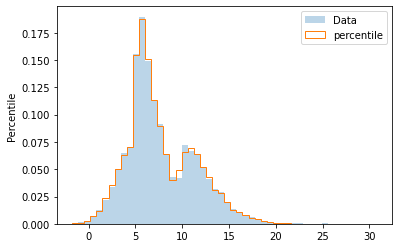

In [29]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_p = interp1d(ps / 100, x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label='Data');
plt.hist(samp_p, bins=bins, density=True, histtype='step', label='percentile');
plt.ylabel('Percentile');
plt.legend();

In [30]:
df = pd.read_csv("../../data/height_weight.csv")
df.head()

,sex,height,weight
0,1,71.74,259.88
1,1,71.00,186.73
2,2,63.83,172.17
3,1,67.74,174.66
4,2,67.28,169.20


In [31]:
df[['height', 'weight']].cov()

,height,weight
height,18.602008,78.502181
weight,78.502181,1512.912088


In [32]:
df[['height', 'weight']].corr()

,height,weight
height,1.000000,0.467945
weight,0.467945,1.000000
